In [12]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from glob import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [14]:
#df_folder = '/Users/ayesh/Downloads/HA_test3/'
#df_folder = '/Users/ayesh/Downloads/exp3/'
#df_folder = '/Users/ayesh/Downloads/Emoinference_dt/XYhappy_exp3/'
 
df_folder = '/Users/ayesh/Downloads/right_thresh/3_ha/'

behav_files = [f for f in listdir(df_folder) if isfile(join(df_folder, f))]

csv_list = []
all_good = []
not_usable = []
discard = []

for b in behav_files:
    if b[-4:] == ".csv":
        csv_list.append(df_folder + b)
        
for a in csv_list:
    try:
        one_file = pd.read_csv(a, header = 0)
        one_file.columns = one_file.columns.str.replace(".", "_")
        fin_q = 'key_resp_33_keys'
        #subid = 'workerID'
        if fin_q in one_file.columns:
            all_good.append(a)
        else:
            not_usable.append(a)
    except Exception as e:
        discard_file = [e, a]
        discard.append(a)
#print(discard)

In [15]:
discard
discard_folder = df_folder + 'discard/'
for e in discard:
    shutil.copy(e, discard_folder)

In [16]:
subid = []
avg_AB1 = []
avg_AB2 = []
avg_AB3 = []
avg_BC = []
avg_AC = []
avg_ABfinal = []
avg_BCfinal = []
check_df = []

for pt_file in all_good:
    df = pd.read_csv(pt_file, header=0)
    df.columns = df.columns.str.replace(".", "_")
    df.replace(r'\s+',np.nan,regex=True).replace('',np.nan)
    participant_name = df.workerID[0]
    AB1corr = df.key_resp_corr
    AB2corr = df.key_resp_2_corr
    AB3corr = df.key_resp_3_corr
    BCcorr = df.key_resp_4_corr
    ACcorr = df.key_resp_5_corr

    AB1_trialresp = df.key_resp_keys
    AB2_trialresp = df.key_resp_2_keys
    AB3_trialresp = df.key_resp_3_keys
    BC_trialresp = df.key_resp_4_keys
    AC_trialresp = df.key_resp_5_keys
 
    
    t_AB1trials = []
    t_AB2trials = []
    t_AB3trials = []
    t_BCtrials = []
    t_ACtrials = []
    
    t_AB1corr = []
    t_AB2corr = []
    t_AB3corr = []
    t_BCcorr = []
    t_ACcorr = []

    
    if (AB1_trialresp.isnull().all() == True) or (AB2_trialresp.isnull().all() == True) or (AB3_trialresp.isnull().all() == True) or (BC_trialresp.isnull().all() == True) or (AC_trialresp.isnull().all() == True):
        check_df.append(participant_name)
    
    for index, row in df.iterrows():
        try:
            
            if np.isnan(AB1_trialresp[index]) == False:
                t_AB1trials.append(row)
            total_AB1resp = len(t_AB1trials)/48

            if AB1corr[index] == 1:
                t_AB1corr.append(row)
            prop_correct = len(t_AB1corr)/len(t_AB1trials)

            if np.isnan(AB2_trialresp[index]) == False:
                t_AB2trials.append(row)
            total_AB2resp = len(t_AB2trials)/48

            if AB2corr[index] == 1:
                t_AB2corr.append(row)
            prop_correct2 = len(t_AB2corr)/len(t_AB2trials)

            if np.isnan(AB3_trialresp[index]) == False:
                t_AB3trials.append(row)
            total_AB3resp = len(t_AB3trials)/48

            if AB3corr[index] == 1:
                t_AB3corr.append(row)
            prop_correct3 = len(t_AB3corr)/len(t_AB3trials)

            if np.isnan(BC_trialresp[index]) == False:
                t_BCtrials.append(row)
            total_BCresp = len(t_BCtrials)/48

            if BCcorr[index] == 1:
                t_BCcorr.append(row)
            prop_correctBC = len(t_BCcorr)/len(t_BCtrials)

            if np.isnan(AC_trialresp[index]) == False:
                t_ACtrials.append(row)
            total_ACresp = len(t_ACtrials)/48

            if ACcorr[index] == 1:
                t_ACcorr.append(row)
            prop_correctAC = len(t_ACcorr)/len(t_ACtrials)

            if np.isnan(finalAB_trialresp[index]) == False:
                t_finalABtrials.append(row)
            total_finalABresp = len(t_finalABtrials)/48

            if finalABcorr[index] == 1:
                t_finalABcorr.append(row)
            prop_correctfinalAB = len(t_finalABcorr)/len(t_finalABtrials)

            if np.isnan(finalBC_trialresp[index]) == False:
                t_finalBCtrials.append(row)
            total_finalBCresp = len(t_finalBCtrials)/48

            if finalBCcorr[index] == 1:
                t_finalBCcorr.append(row)
            prop_correctfinalBC = len(t_finalBCcorr)/len(t_finalBCtrials)
            
        except:
            pass
        
    subid.append(participant_name)
    avg_AB1.append(prop_correct)
    avg_AB2.append(prop_correct2)
    avg_AB3.append(prop_correct3)
    avg_BC.append(prop_correctBC)
    avg_AC.append(prop_correctAC)

In [17]:
check_df

['A1AG1942QZLMVQ',
 'A1FGEOPFNUXCHQ',
 'A1IML32F9ZNXPP',
 'A27INSDNTACWAM',
 'A2Q2G74TV4H2FX',
 'AQKC1VIZAZ6VI',
 'A17A6XCQQ9JKMZ',
 'A2JR38ES001MRL',
 'A2YCMT5BPA0AG9',
 'A3EPL7L8U3M2IB',
 'A3EPL7L8U3M2IB',
 'A1QUQ0TV9KVD4C',
 'A1IML32F9ZNXPP']

In [18]:
my_df = pd.DataFrame(list(zip(subid, avg_AB1, avg_AB2, avg_AB3, avg_BC, avg_AC)), 
                     columns = ['participant', 'Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg AC'])

my_df

,participant,Avg AB1,Avg AB2,Avg AB3,Avg BC,Avg AC
0,A17C7V37FFWLDM,0.291667,0.382353,0.357143,0.327869,0.375000
1,A1AG1942QZLMVQ,0.291667,0.382353,0.357143,0.327869,0.375000
2,A1DCG37N0Y8BN0,0.553191,0.895833,1.000000,0.708333,0.833333
3,A1FGEOPFNUXCHQ,0.439024,0.435897,0.318182,0.420290,0.833333
4,A1FULFCTOFA4L8,0.322581,0.257143,0.315789,0.350877,0.225000
...,...,...,...,...,...,...
72,A1IML32F9ZNXPP,0.357143,0.487179,0.489362,0.449438,0.297872
73,A1KBR3K2TGYXJO,0.285714,0.419355,0.425000,0.375000,0.190476
74,A2S0MB5JFG8DF,0.652174,0.893617,0.979167,0.677083,0.875000
75,A3HG1IN2Q21HXL,0.500000,0.238095,0.000000,0.338710,0.269231


In [19]:
melted_df = pd.melt(my_df, id_vars=['participant'], value_vars=['Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg AC'], var_name='condition', value_name='Total_acc')
melted_df

,participant,condition,Total_acc
0,A17C7V37FFWLDM,Avg AB1,0.291667
1,A1AG1942QZLMVQ,Avg AB1,0.291667
2,A1DCG37N0Y8BN0,Avg AB1,0.553191
3,A1FGEOPFNUXCHQ,Avg AB1,0.439024
4,A1FULFCTOFA4L8,Avg AB1,0.322581
...,...,...,...
380,A1IML32F9ZNXPP,Avg AC,0.297872
381,A1KBR3K2TGYXJO,Avg AC,0.190476
382,A2S0MB5JFG8DF,Avg AC,0.875000
383,A3HG1IN2Q21HXL,Avg AC,0.269231


## check if meeting threshold 75% accuracy in AB3

In [20]:
below_threshAB = []
below_threshBC = []
yikes = []

Acc_below_threshAB = []
Acc_below_threshBC = []
Acc_yikes = []
col = []

for index, rows in melted_df.iterrows():
    if melted_df.condition[index] == 'Avg AB3' and melted_df.Total_acc[index] <= 0.66: ##previously 0.66 and 0.75
        subb = [melted_df.Total_acc[index], melted_df.participant[index]]
        below_threshAB.append(melted_df.participant[index])
        Acc_below_threshAB.append(melted_df.Total_acc[index])
        col.append('black')
        
    if melted_df.condition[index] == 'Avg BC' and melted_df.Total_acc[index] <= 0.66:
        below_threshBC.append(melted_df.participant[index])
        Acc_below_threshBC.append(melted_df.Total_acc[index])
        col.append('black')
        
    if melted_df.condition[index] == 'Avg AC' and melted_df.Total_acc[index] <= 0.33:
        subb = [melted_df.Total_acc[index], melted_df.participant[index]]
        yikes.append(melted_df.participant[index])
        Acc_yikes.append(melted_df.Total_acc[index])
        col.append('black')
        
print('AB', below_threshAB)
print('AC', yikes)
#print('BC', below_threshBC)

#melted_df.loc[(melted_df['Total_acc'] <= 0.33 and melted_df['condition'] == 'Avg AC', 'exclusion')] = 'Direct'

#melted_df.head()

AB ['A17C7V37FFWLDM', 'A1AG1942QZLMVQ', 'A1FGEOPFNUXCHQ', 'A1FULFCTOFA4L8', 'A1H6DME332958N', 'A1H6DME332958N', 'A1H6DME332958N', 'A1IML32F9ZNXPP', 'A1MBZ1FOH9ZFW1', 'A1SN0UU3V61IIM', 'A2EG8ECTIUMPLE', 'A2MM8RN9555ZNJ', 'A2Q2G74TV4H2FX', 'A2TSMMOZ9TN1R9', 'A2WWYVKGZZXBOB', 'A3EA4SHCLJ1UZQ', 'A3FNC8ELMK8YJA', 'A3FOKP72T5I4FR', 'A3FPBLKQZ3U2WP', 'ACRTRQ23XH20E', 'AL1U6BGXX0WD5', 'ARWN6TT8EWCFJ', 'A1YQY0AAF65RMZ', 'A1H6DME332958N', 'A179M1VP5QMHNW', 'AB3Z97M4JJLK5', 'A3AQTZD885IB36', 'A1QUQ0TV9KVD4C', 'A2CM5OMFQ6OUIU', 'A1IML32F9ZNXPP', 'A1KBR3K2TGYXJO', 'A3HG1IN2Q21HXL', 'A2ZGXFDB2PWBG4']
AC ['A1FULFCTOFA4L8', 'A1SN0UU3V61IIM', 'A2I6ZALE49CVSC', 'A2MM8RN9555ZNJ', 'A3EA4SHCLJ1UZQ', 'A3FNC8ELMK8YJA', 'A3FOKP72T5I4FR', 'A3FPBLKQZ3U2WP', 'AL1U6BGXX0WD5', 'AQKC1VIZAZ6VI', 'ARWN6TT8EWCFJ', 'A1YQY0AAF65RMZ', 'A1H6DME332958N', 'AIYVR3CSOLNB', 'A2YCMT5BPA0AG9', 'A179M1VP5QMHNW', 'AB3Z97M4JJLK5', 'A2CM5OMFQ6OUIU', 'A1IML32F9ZNXPP', 'A1KBR3K2TGYXJO', 'A3HG1IN2Q21HXL', 'A2ZGXFDB2PWBG4']


In [21]:
analysis_path = df_folder + 'complete_data/usable/'
belowthresh = df_folder + 'complete_data/below_thresh/'
missed_phase = df_folder + 'complete_data/missed_phase/'
#complete = df_folder + 'complete_data'
for g in all_good:
    f_file = pd.read_csv(g, header= 0)
    subname = f_file.workerID[0]
    if subname in check_df:
        shutil.copy(g, missed_phase)
    elif subname in below_threshAB: ## previously also excluded for subname in yikes:
        shutil.copy(g, belowthresh)
    else:
        shutil.copy(g, analysis_path)
        #shutil.copy(g, complete)

### QC illustration

In [17]:
# make a graph for exclusions
analysis_path = df_folder + 'complete_data/usable/'
completeDsets = '/Users/ayesh/Downloads/pull/complete_data/' 
orig = [f for f in listdir(completeDsets) if isfile(join(completeDsets, f))]
used = [f for f in listdir(analysis_path) if isfile(join(analysis_path, f))]
ABthrsh = np.mean(Acc_below_threshAB)
BCthrsh = np.mean(Acc_below_threshBC)
ACthrsh = np.mean(Acc_yikes)

#CTEs = [ABthrsh, BCthrsh, ACthrsh]
x_pos = ['AB3', 'BC', 'AC']
(AB3, BC, AC) = (Acc_below_threshAB, Acc_below_threshBC, Acc_yikes)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/ayesh/Downloads/test3/complete_data/usable/'

In [18]:
from pylab import plot, array
for temp in zip(*(AB3, BC, AC)):
    plt.scatter(x_pos, array(temp))

NameError: name 'AB3' is not defined

AttributeError: 'bool' object has no attribute 'all'

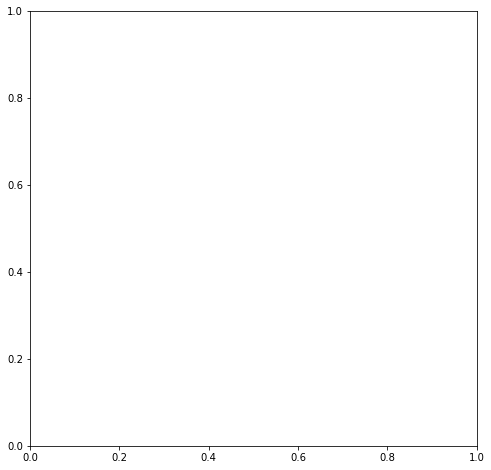

In [54]:
fig, ax = plt.subplots(figsize=(8,8))
sns.swarmplot(x = x_pos, y = zip(*(AB3, BC, AC)), palette = 'mako', ax = ax)

ax.bar(x_pos, CTEs,
       align='center',
       alpha=0.8,
       width=0.4,
       color='slategray',
       ecolor='black',
       capsize=10)
ax.set_ylabel('Close Response Bias')
ax.set_xlabel('Boundary Conditions')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Boundary Conditions- Temporal Distance')

# ### swarmplot
red = '#c04e01'
blue = '#0165fc'